Embedding Component of The transformer

In [2]:
import torch
from torch import nn
import torch.nn.functional as F
import math

Check the Torch Import

In [3]:
random_torch = torch.rand(4,4)
print(random_torch)

tensor([[0.6477, 0.6559, 0.9705, 0.7393],
        [0.0923, 0.0499, 0.0481, 0.5680],
        [0.3250, 0.6825, 0.0732, 0.8839],
        [0.3865, 0.0766, 0.5110, 0.3031]])


In [4]:
from torch import Tensor

class TokenEmbedding(nn.Embedding):
    def __init__(self, vocab_size, d_model=512):
        super(TokenEmbedding, self).__init__(vocab_size, d_model, padding_idx=1)

In [5]:
class PositionalEmbedding(nn.Module):
    def __init__(self, d_model, device, max_len=512):
        super().__init__()
        self.encoding = torch.zeros(max_len, d_model, device=device)
        self.encoding.requires_grad = False
        position = torch.arange(0, max_len, device=device)
        position = position.float().unsqueeze(1)
        _2i = torch.arange(0, d_model, step=2, device=device).float()
        self.encoding[:, 0::2] = torch.sin(position / (10000 ** (_2i / d_model)))
        self.encoding[:, 1::2] = torch.cos(position / (10000 ** (_2i / d_model)))

    def forward(self, x):
        batch_size, seq_len = x.size(0), x.size(1)
        return self.encoding[:seq_len, :]
    
class TransformerEmbedding(nn.Module):
    def __init__(self, vocab_size, d_model, device, drop_prob, max_len=512):
        super().__init__()
        self.tok_emb = TokenEmbedding(vocab_size, d_model)
        self.pos_emb = PositionalEmbedding(d_model, max_len=max_len, device)
        self.drop_out = nn.Dropout(p=drop_prob)
        self.d_model = d_model

    def forward(self, x):
        tok_emb = self.tok_emb(x)
        pos_emb = self.pos_emb(x)
        return self.drop_out(tok_emb + pos_emb)

SyntaxError: incomplete input (450839624.py, line 20)

# Visualize the Low-frequency and High-frequence Positional Embedding information.

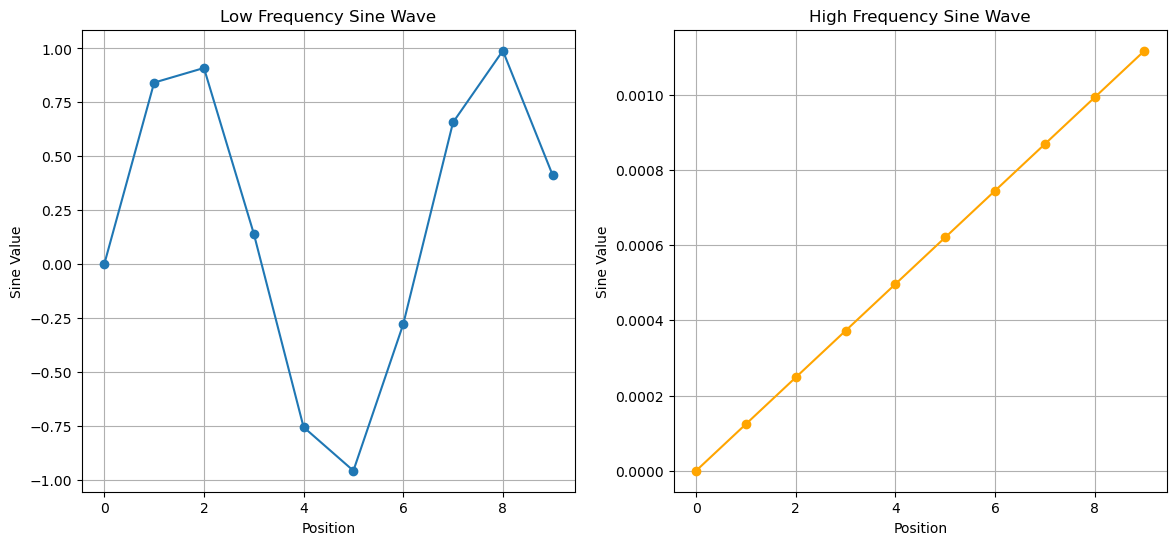

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define positions (pos) and the dimension (i)
positions = np.arange(0, 10)  # Positions from 0 to 9
d_model = 512

# Low frequency (slow-changing) sine wave
low_freq = np.sin(positions / (10000 ** (0 / d_model)))

# High frequency (fast-changing) sine wave
high_freq = np.sin(positions / (10000 ** (500 / d_model)))  # Higher dimension (i=500)

# Plot the results
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(positions, low_freq, marker='o')
plt.title('Low Frequency Sine Wave')
plt.xlabel('Position')
plt.ylabel('Sine Value')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(positions, high_freq, marker='o', color='orange')
plt.title('High Frequency Sine Wave')
plt.xlabel('Position')
plt.ylabel('Sine Value')
plt.grid(True)

plt.show()
